<a href="https://colab.research.google.com/github/goswamiaman172/Bike-Sharing-Demand-Predict/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Import libraries**

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import the dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Almabetter DataScience/Captson2/Bikes count/data/Copy of SeoulBikeData.csv',encoding="ISO-8859-1")

## **Data Inspection**

In [ ]:
df.shape

(8760, 14)

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# statistical info
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# duplicate
len(dataset[dataset.duplicated()])

0

In [ ]:
# unique values
df.apply(lambda x: len(x.unique()))

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

# **Preprocessing the dataset**

In [ ]:
# check for null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

So add the Month column with the help of the Date 

In [ ]:
df['month'] = pd.DatetimeIndex(df['Date']).month

Convert into the Week days

In [ ]:
# Covert Date also into the day
df['Date']=pd.to_datetime(df['Date'],format="%d/%m/%Y")

df['Day']=df["Date"].dt.day_name()

Rename the Column with specific names

In [ ]:
df = df.rename(columns={'Temperature(°C)':'Temperature',
                       'Humidity(%)':'Humidity',
                       'Snowfall (cm)':'Snowfall',
                       'Solar Radiation (MJ/m2)':'Solar Radiation',
                       'Rainfall(mm)':'Rainfall',
                       'Dew point temperature(°C)':'Dew point temperature',
                        'Visibility (10m)':'Visibility',
                        'Wind speed (m/s)':'Wind speed'})
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,month,Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday


Variable which informs us if it is night or day

In [ ]:
df['label_day_night']=df['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))

# **Exploratory Data Analysis**



Plotting variables with Target Variable

Plots By Temperature

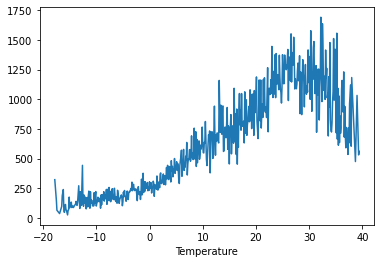

In [ ]:
df.groupby('Temperature').mean()['Rented Bike Count'].plot()

Inference:people like to ride bikes when it is pretty hot around 25°C in average

In [ ]:
# Function for plotting each categorical feature against rented_bike_count 
def get_count_plot(x):
  x=x
  y='Rented Bike Count'
  plt.figure(figsize=(15,5))
  sns.barplot(x=x,y=y,data=df)
  plt.title(x+' vs {}'.format(y),fontsize=20)
  plt.xlabel(x,fontsize=15)
  plt.ylabel(y,fontsize=15)

Plot by hours

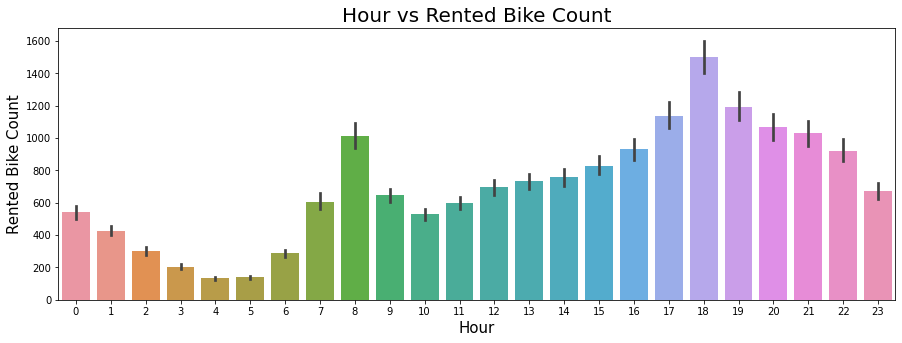

In [ ]:
# Hour vs rented_bike_count
get_count_plot('Hour')

Inference:In morning hours(8-9) and in evening hours (5-8),the bikes taken for rental are more

Plot by Dates

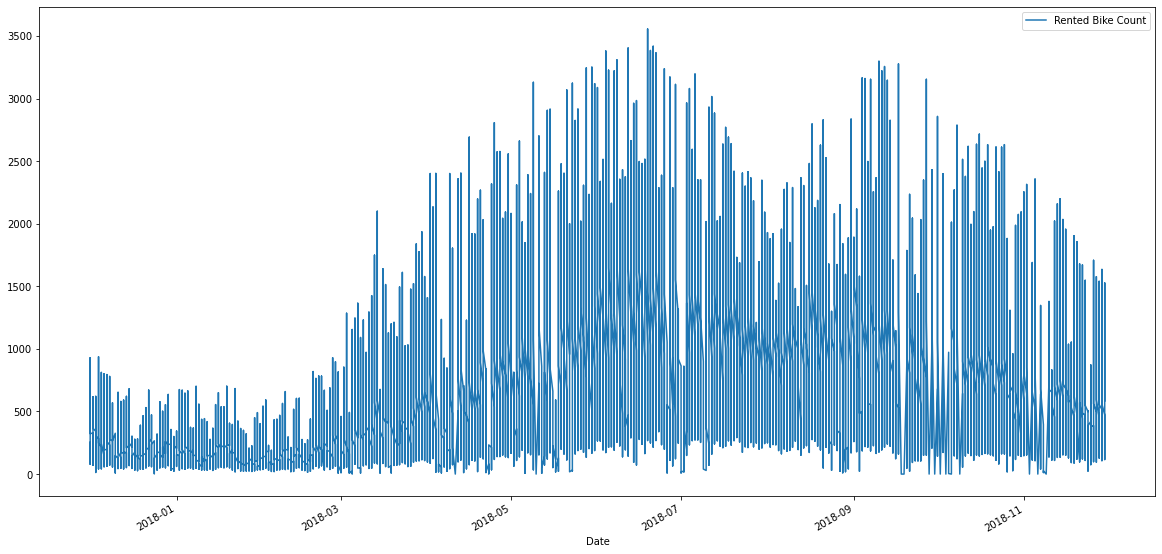

In [ ]:
#visualisation on Bike Rented 
df.plot(x='Date',y='Rented Bike Count',kind='line',figsize = (20,10))
plt.show()

So let's focus on the seasons where we have the most rents because at the month of may (5) to july(7) bikes have the most rents.

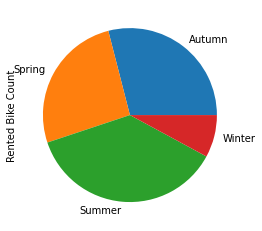

In [ ]:
df.groupby('Seasons').sum()['Rented Bike Count'].plot.pie()
plt.show()

Inference: Bikes taken for rental are more in Summer and less in Winter

Plots by Months

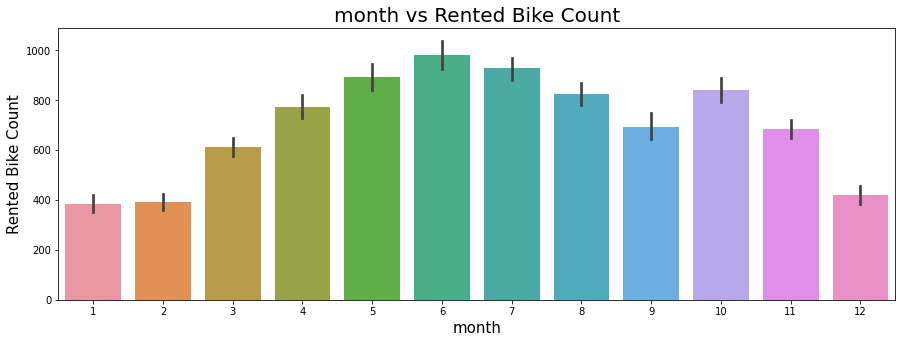

In [ ]:
# month vs rented_bike_count
get_count_plot('month')

Inference: Bike rentals are more from May to August month

Plots By Day

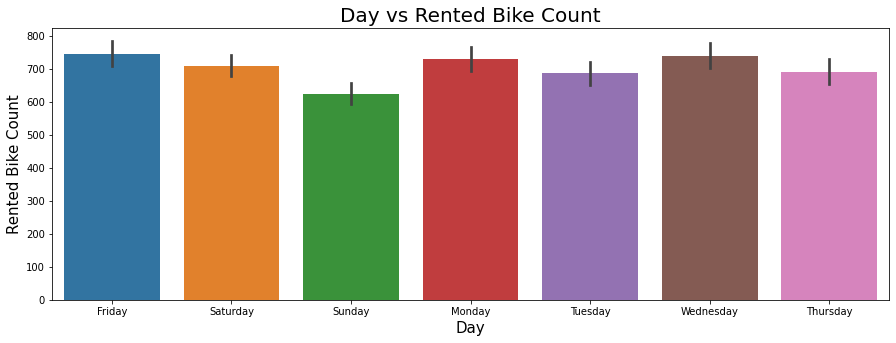

In [ ]:
get_count_plot('Day')

Here we see at the weekend(Sunday) Bike goes to be rented less compare to the working days

Plots by Holiday

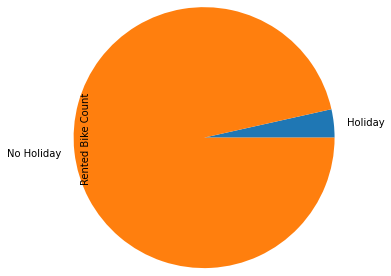

In [ ]:
df.groupby('Holiday').sum()['Rented Bike Count'].plot.pie(radius=1.5)

Inference: During No Holidays,the bikes taken for rental are more than during holidays

Plots by Functioning Day and Non functioning day

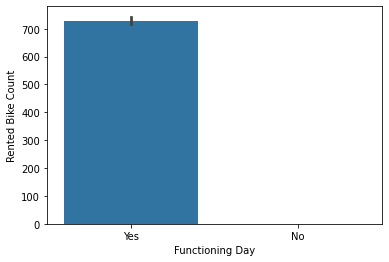

In [ ]:
# functioning_day vs rented_bike_count
sns.barplot(x='Functioning Day',y='Rented Bike Count',data=df)

Inference: Bikes for rental are very high during functioning days

Plots by Rainfall

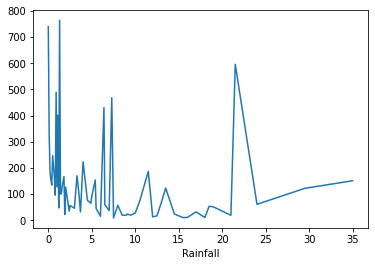

In [ ]:
df.groupby('Rainfall').mean()['Rented Bike Count'].plot()

We can see that even if it rains a lot of rent bikes, here for example even if we have 20 mm of rain there is a big peak of rented bikes

Plots By Snowfall

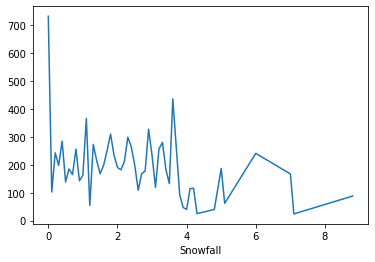

In [ ]:
df.groupby('Snowfall').mean()['Rented Bike Count'].plot()

Inference:When snowfall has more than 4 cm of snow, the bike rents is much lower

Variable which informs us if it is night or day

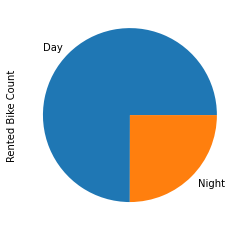

In [ ]:
df.groupby('label_day_night').sum()['Rented Bike Count'].plot.pie()

Inference:Number of Bike Rented in day is high as compare to the night

In [ ]:
# Function for plotting one feature against another
def get_plot(x,hue):
  x=x
  hue=hue
  y='Rented Bike Count'
  plt.figure(figsize=(17,5))
  sns.pointplot(x=x,y=y,hue=hue,data=df)
  plt.xlabel(x,fontsize=(15))
  plt.ylabel(y,fontsize=(15))
  plt.title(y+' '+'during different {}'.format(hue),fontsize=(20))


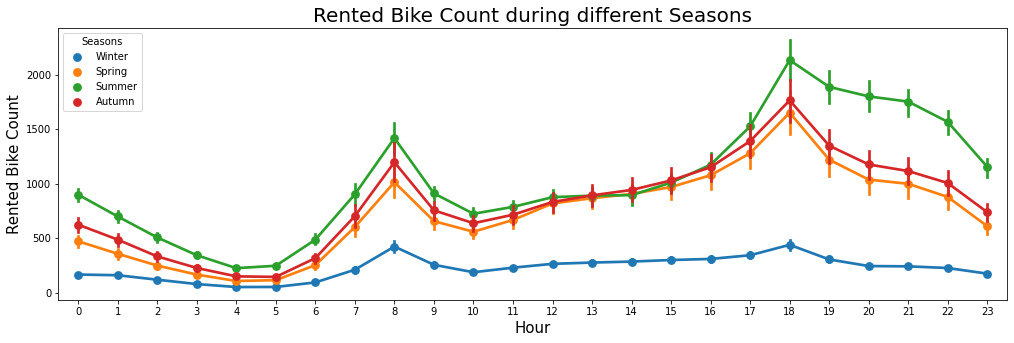

In [ ]:
# Hourly rental bike counts during different seasons
get_plot('Hour','Seasons')

Inference:

1)During Summer ,rented bikes are more in each hour than other seasons

2)During Winter ,rented bikes are less in each hour compared to other seasons

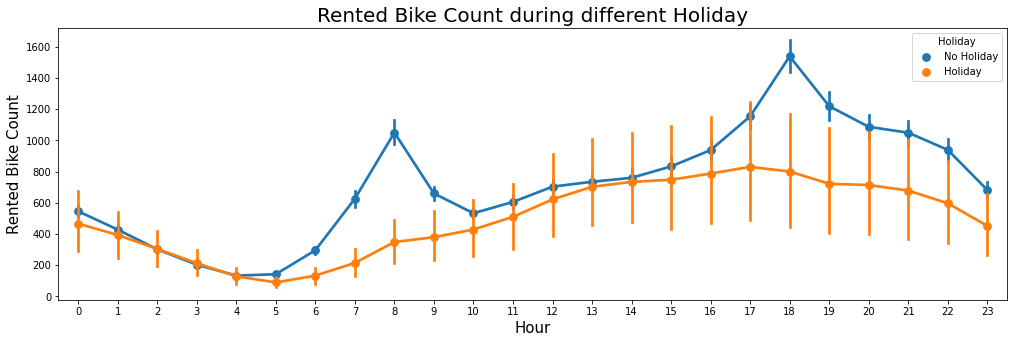

In [ ]:
# Hourly rental bike counts during different holiday
get_plot('Hour','Holiday')

Inference: During No Holiday,rented bikes are more than during Holidays in each hour

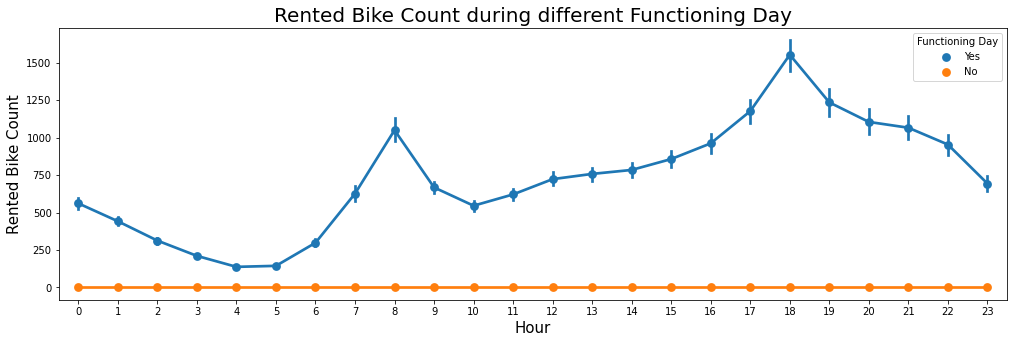

In [ ]:
# Hourly rental bike counts during different functioning days
get_plot('Hour','Functioning Day')

Inference: During functioning days,rented bikes count is more than non_functioning days in each hour

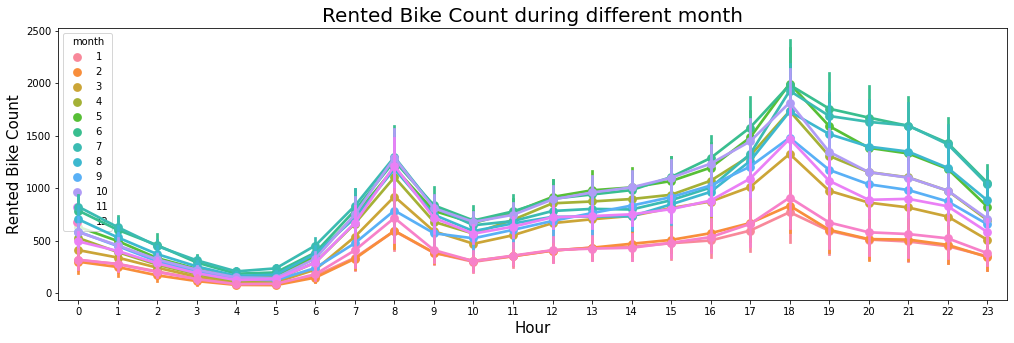

In [ ]:
# Hourly rental bike counts during different months
get_plot('Hour','month')

Inference:During may,june,july and august months rented bikes count is observed more during 5pm to 7pm

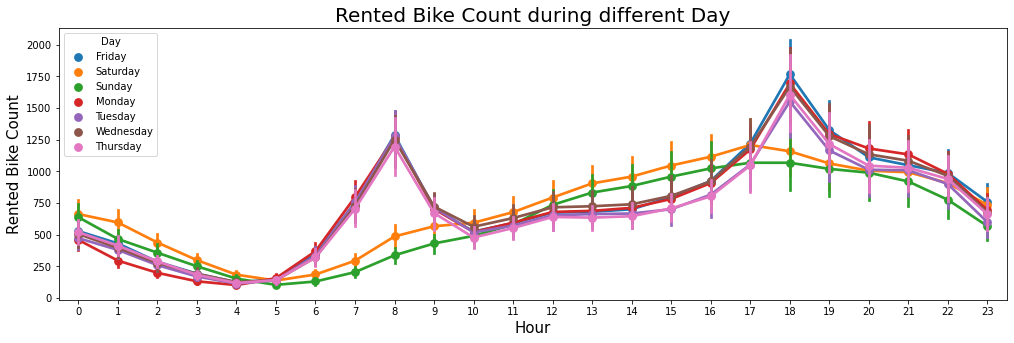

In [ ]:
# Seasonly rental bikes count during different hours
get_plot('Hour','Day')

Inference:

At Saturday and Sunday we see the Bike rented is less but at the evening time it goes bit up.

Monday to friday all the hours seems like same for the Rented Bike count

**Some preprocess with data**

Convert Values to FLoat

In [ ]:
colms = ['Humidity','Visibility']

for col in colms:
    df[col] = df[col].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented Bike Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   float64       
 5   Wind speed             8760 non-null   float64       
 6   Visibility             8760 non-null   float64       
 7   Dew point temperature  8760 non-null   float64       
 8   Solar Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [ ]:
# Changing datatype object to category
cols = ['Seasons','month','Hour','Holiday','Functioning Day']

for col in cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented Bike Count      8760 non-null   int64         
 2   Hour                   8760 non-null   category      
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   float64       
 5   Wind speed             8760 non-null   float64       
 6   Visibility             8760 non-null   float64       
 7   Dew point temperature  8760 non-null   float64       
 8   Solar Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   category      
 12  Holiday                8760 non-null   category      
 13  Fun

In [ ]:
encoders_nums = {"Holiday":{"Holiday":1,"No Holiday":0},
                 "Functioning Day":{"Yes":1,"No":0}}

df = df.replace(encoders_nums)

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,month,Day,label_day_night
0,2017-12-01,254,0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,0,1,1,Friday,Night
1,2017-12-01,204,1,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,0,1,1,Friday,Night
2,2017-12-01,173,2,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,Winter,0,1,1,Friday,Night
3,2017-12-01,107,3,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,Winter,0,1,1,Friday,Night
4,2017-12-01,78,4,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,Winter,0,1,1,Friday,Night


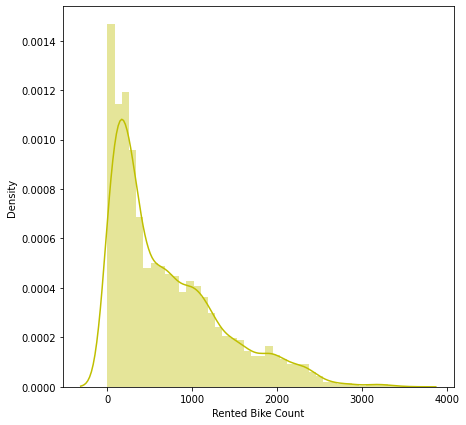

In [ ]:
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(7,7))
sns.distplot(df['Rented Bike Count'],color="y")

In [ ]:
df['Rented Bike Count'] = np.log(df['Rented Bike Count'])

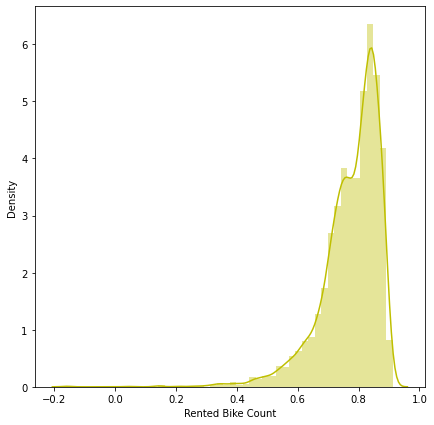

In [ ]:
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['Rented Bike Count']),color="y")

In [ ]:
df.info()

In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Temperature', 'Humidity', 'Wind speed',
       'Visibility', 'Dew point temperature', 'Solar Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

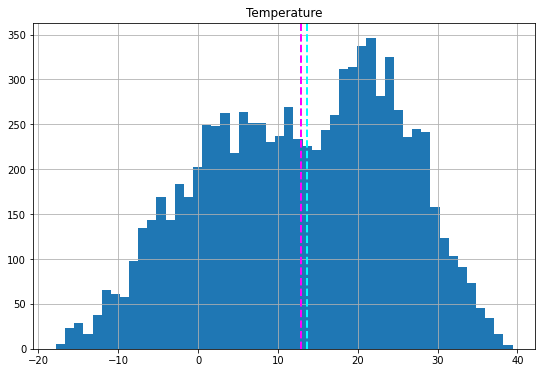

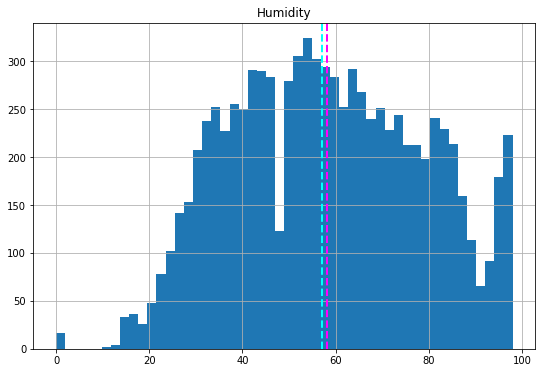

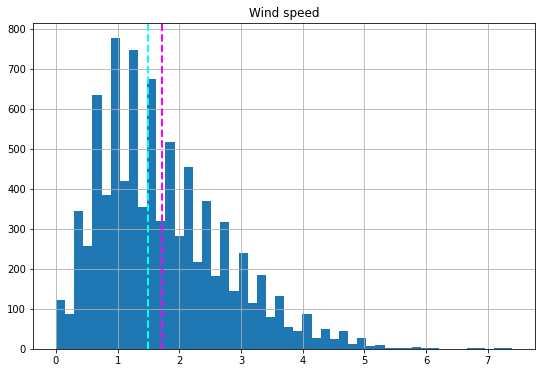

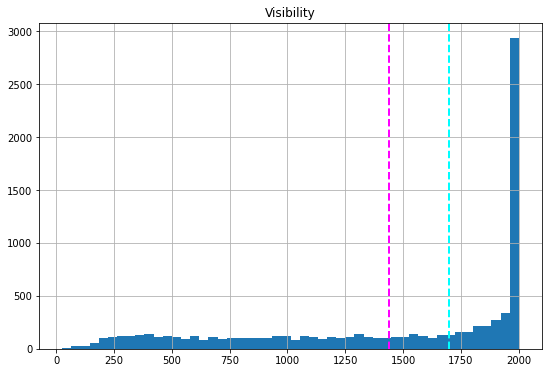

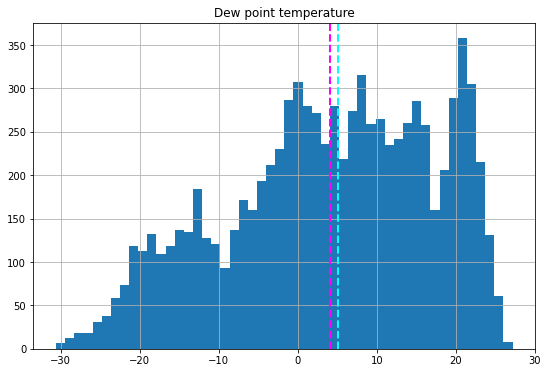

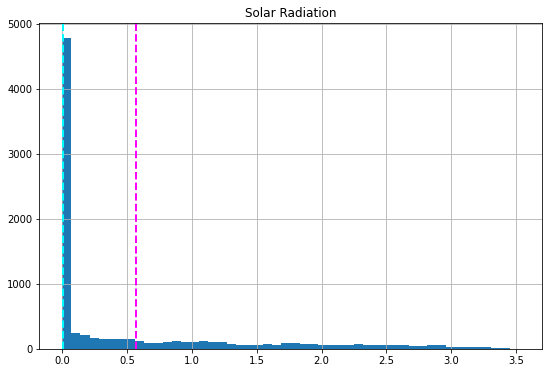

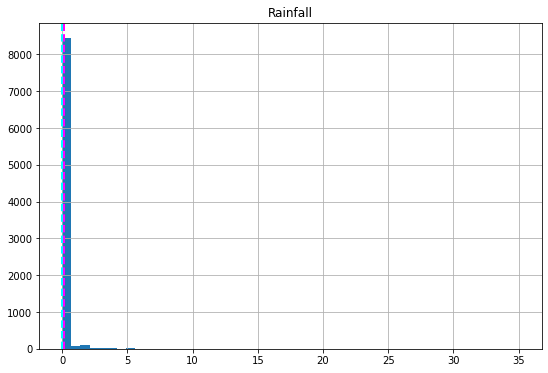

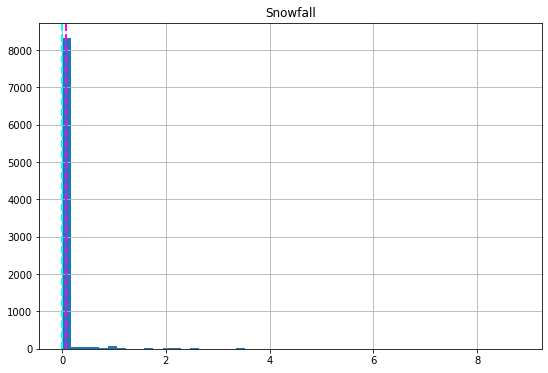

In [ ]:
# plot a bar plot for each numerical feature count (except car_ID)

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature', 'Humidity', 'Wind speed',
       'Visibility', 'Dew point temperature', 'Solar Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning Day', 'month'],
      dtype='object')

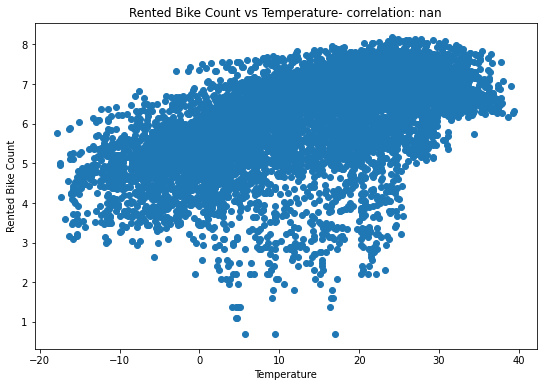

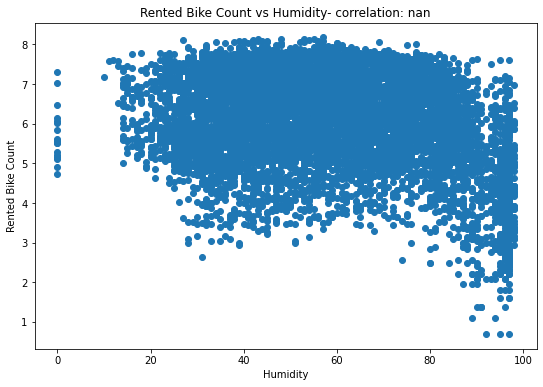

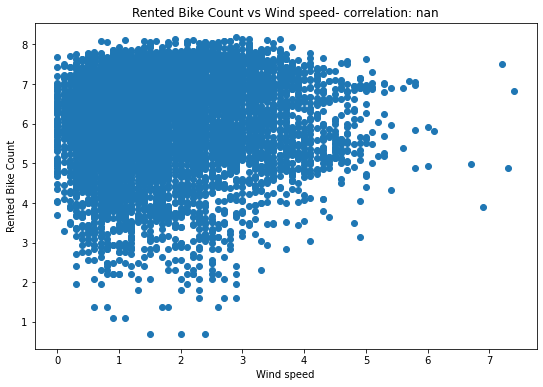

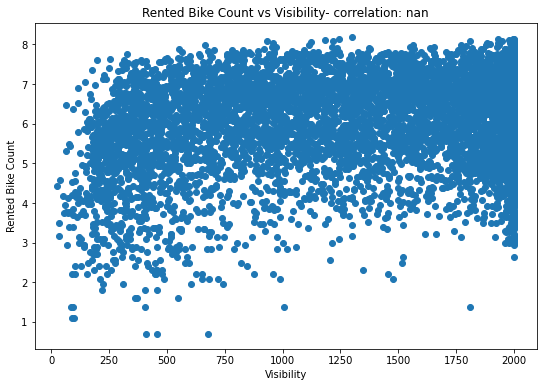

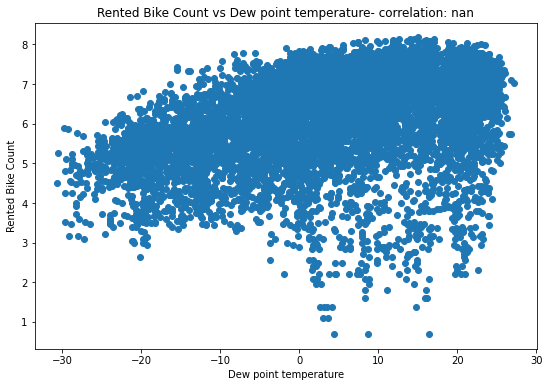

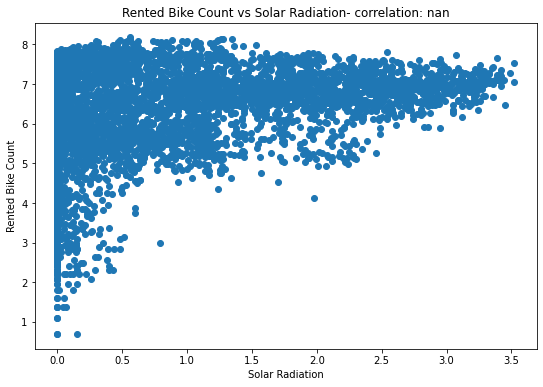

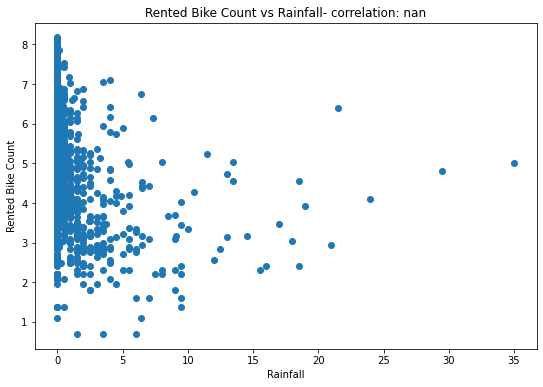

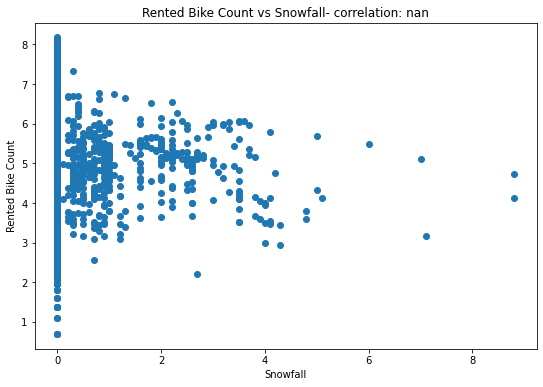

In [ ]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

To fine the correlation between the data set neet to make the heatmap

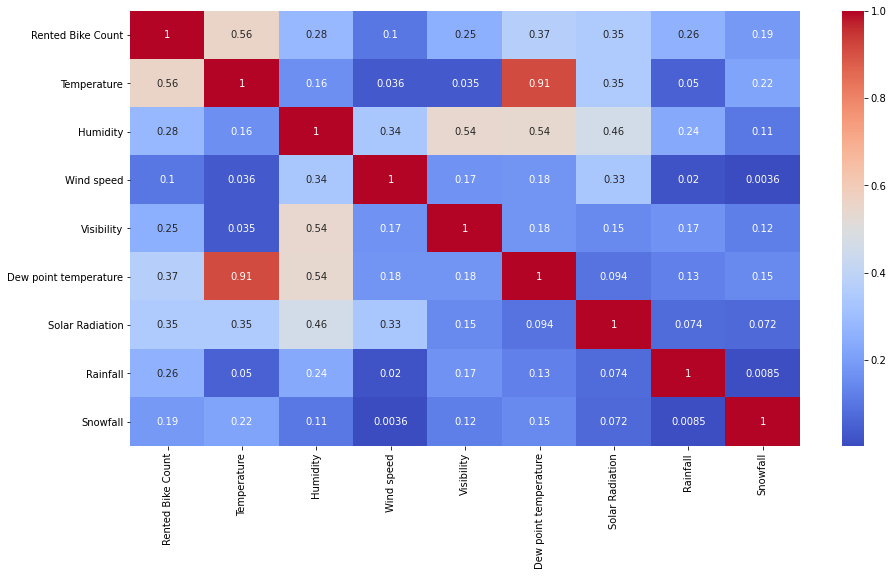

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

We see that Correlation between the Temperature and Dew Point Temperature is very high so we remove the Dew point temperature because the correlation with the Rented Bike Count with Temperature is more.

In [ ]:
df.drop('Dew point temperature',axis='columns', inplace=True)

This is the list of sorted correlation of variables to the target

In [ ]:
df1Corr=pd.DataFrame(df.corr().unstack().sort_values(ascending=False)['Rented Bike Count'],columns=['Correlation to the target'])
df1Corr.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Correlation to the target
Rented Bike Count,1.000000
Temperature,0.559564
Solar Radiation,0.353270
Visibility,0.252039
Wind speed,0.103824
Snowfall,-0.187572
Rainfall,-0.262078
Humidity,-0.280555


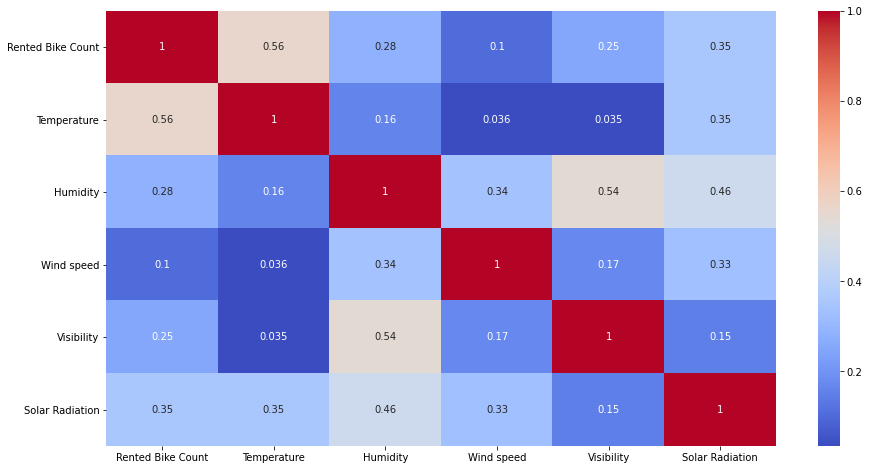

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

**Categorical features**

In [ ]:
categorical_features = df.describe(include=['object','category']).columns

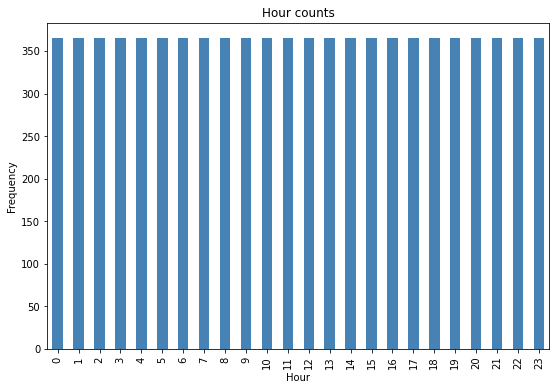

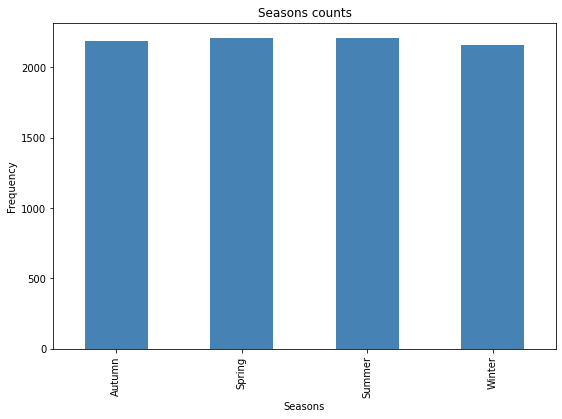

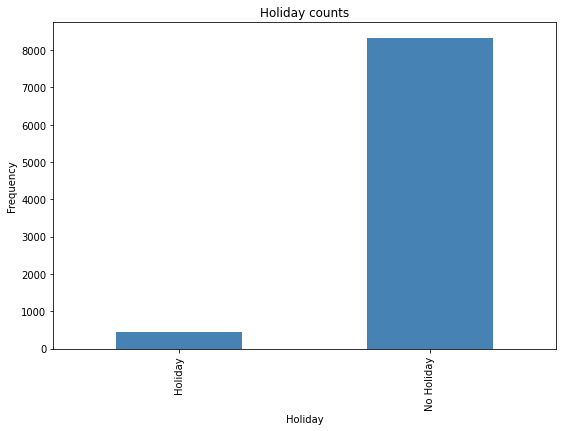

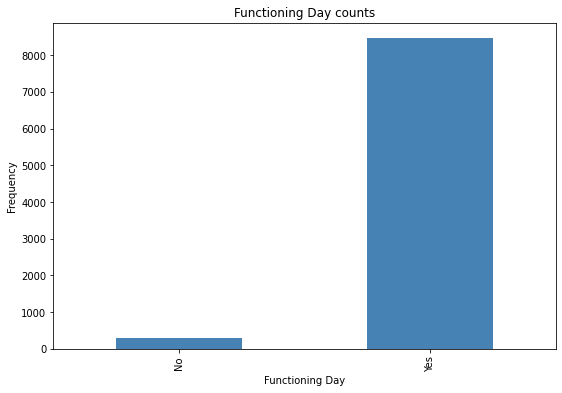

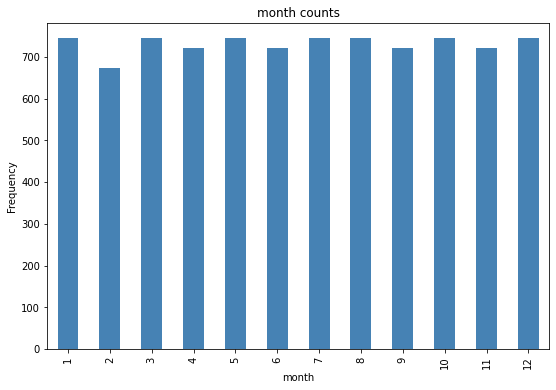

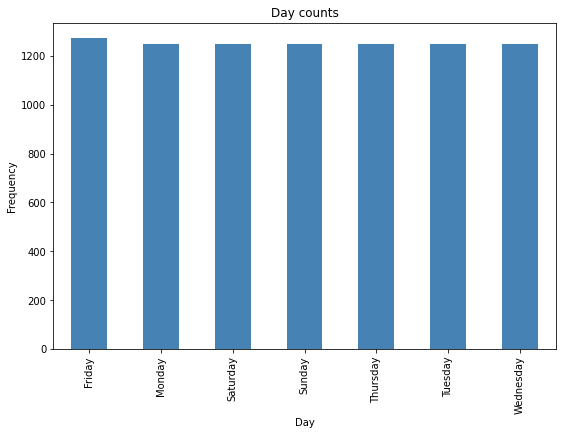

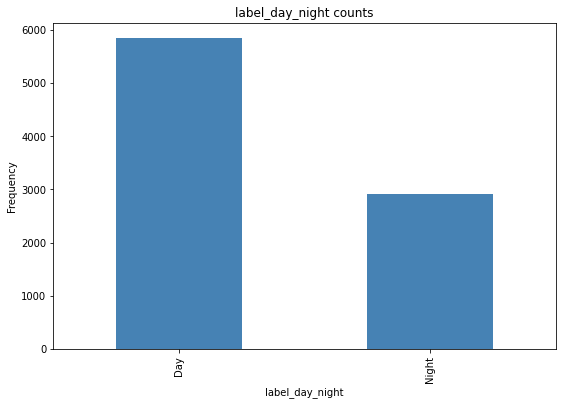

In [ ]:
for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [ ]:
df['Seasons'].value_counts()

Summer    2208
Spring    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [ ]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

Box plot for Categorical Data

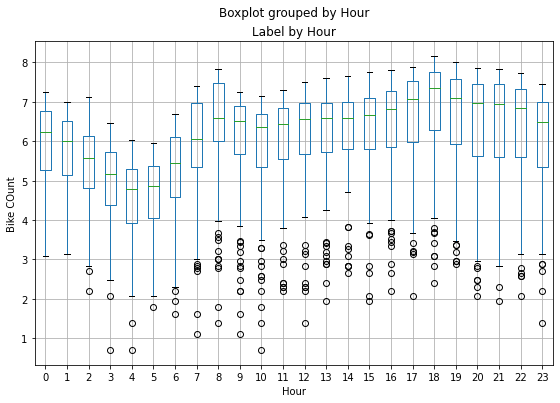

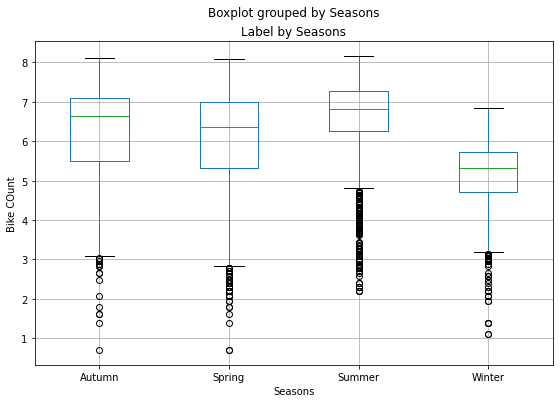

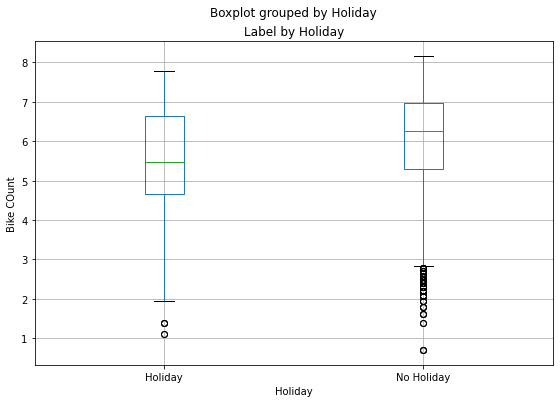

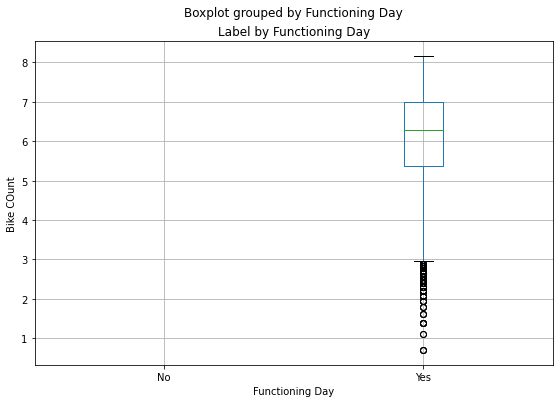

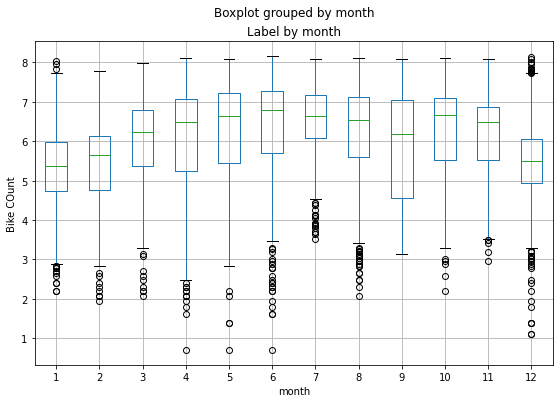

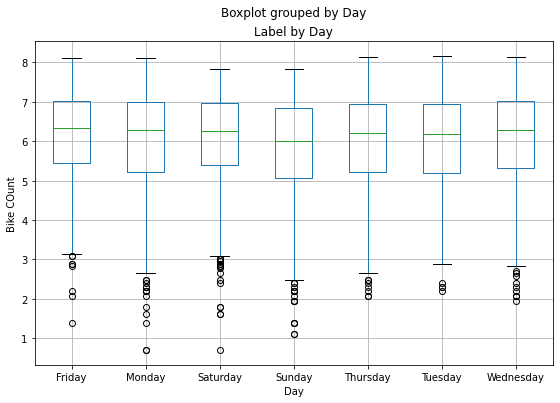

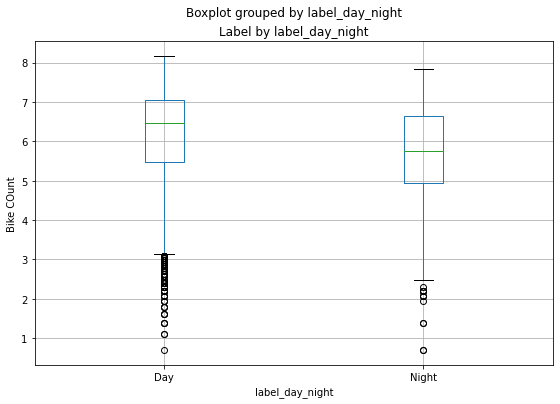

In [ ]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike COunt")
plt.show()

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'Wind speed', 'Visibility', 'Solar Radiation', 'Rainfall', 'Snowfall',
       'Seasons', 'Holiday', 'Functioning Day', 'month', 'Day',
       'label_day_night'],
      dtype='object')

Drop Some of the Columns

In [ ]:
df = df.drop(columns='Date')

In [ ]:
len(df[df['Rainfall']==0.0])

8232

In [ ]:
len(df[df['Snowfall']==0.0])

8317

Need to drop Snowfall and Rainfall coz so much 0 values

In [ ]:
df.drop('Rainfall',axis='columns', inplace=True)

In [ ]:
df.drop('Snowfall',axis='columns', inplace=True)

We create the variable to encode WeekDay

In [ ]:
mapping_dictDay={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

df['WeekDayEncoding']=df['Day'].map(mapping_dictDay)

In [ ]:
df.drop('Day',axis='columns', inplace=True)

In [ ]:
df.drop('label_day_night',axis='columns', inplace=True)

**Need to perform Hot Encoding with the categorical data**

In [ ]:
# One hot encoding
df = pd.get_dummies(df, columns=["Hour", "Seasons","month","WeekDayEncoding"], prefix=["hour", "season","month","weekDay"],drop_first=True)

In [ ]:
df.columns

Index(['Rented Bike Count', 'Temperature', 'Humidity', 'Wind speed',
       'Visibility', 'Solar Radiation', 'Holiday', 'Functioning Day', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23', 'season_Spring', 'season_Summer',
       'season_Winter', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'weekDay_2', 'weekDay_3', 'weekDay_4', 'weekDay_5', 'weekDay_6',
       'weekDay_7'],
      dtype='object')

In [ ]:
df.head()

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Solar Radiation,Holiday,Functioning Day,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,season_Spring,season_Summer,season_Winter,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekDay_2,weekDay_3,weekDay_4,weekDay_5,weekDay_6,weekDay_7
0,5.537334,-5.2,37.0,2.2,2000.0,0.0,No Holiday,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,5.318120,-5.5,38.0,0.8,2000.0,0.0,No Holiday,Yes,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,5.153292,-6.0,39.0,1.0,2000.0,0.0,No Holiday,Yes,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4.672829,-6.2,40.0,0.9,2000.0,0.0,No Holiday,Yes,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,4.356709,-6.0,36.0,2.3,2000.0,0.0,No Holiday,Yes,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented Bike Count  8760 non-null   float64
 1   Temperature        8760 non-null   float64
 2   Humidity           8760 non-null   float64
 3   Wind speed         8760 non-null   float64
 4   Visibility         8760 non-null   float64
 5   Solar Radiation    8760 non-null   float64
 6   Holiday            8760 non-null   int64  
 7   Functioning Day    8760 non-null   int64  
 8   hour_1             8760 non-null   uint8  
 9   hour_2             8760 non-null   uint8  
 10  hour_3             8760 non-null   uint8  
 11  hour_4             8760 non-null   uint8  
 12  hour_5             8760 non-null   uint8  
 13  hour_6             8760 non-null   uint8  
 14  hour_7             8760 non-null   uint8  
 15  hour_8             8760 non-null   uint8  
 16  hour_9             8760 

In [ ]:
df.shape

(8760, 51)

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
df=clean_dataset(df)

In [ ]:
df.shape

(8465, 51)

# **Split the Data Set**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented Bike Count  8465 non-null   float64
 1   Temperature        8465 non-null   float64
 2   Humidity           8465 non-null   float64
 3   Wind speed         8465 non-null   float64
 4   Visibility         8465 non-null   float64
 5   Solar Radiation    8465 non-null   float64
 6   Holiday            8465 non-null   float64
 7   Functioning Day    8465 non-null   float64
 8   hour_1             8465 non-null   float64
 9   hour_2             8465 non-null   float64
 10  hour_3             8465 non-null   float64
 11  hour_4             8465 non-null   float64
 12  hour_5             8465 non-null   float64
 13  hour_6             8465 non-null   float64
 14  hour_7             8465 non-null   float64
 15  hour_8             8465 non-null   float64
 16  hour_9             8465 

In [ ]:
Y = df['Rented Bike Count']
X = df.drop(columns='Rented Bike Count', axis=1)

In [ ]:
Y

In [ ]:
X

Split The Data into train and test

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,Y, test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(6772, 50)
(1693, 50)


# **Model Training**

# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test),(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.5064503030007469
RMSE : 0.7116532182184993


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score((y_test),(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.6349747136136711
Adjusted R2 :  0.6238594491073882


**Lasso Regression**

In [ ]:
### Cross validation
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -0.4317917618523298


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test),(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.5064356798236462
RMSE : 0.7116429440552658


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score((y_test),(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.6349852533040956
Adjusted R2 :  0.6238594491073882


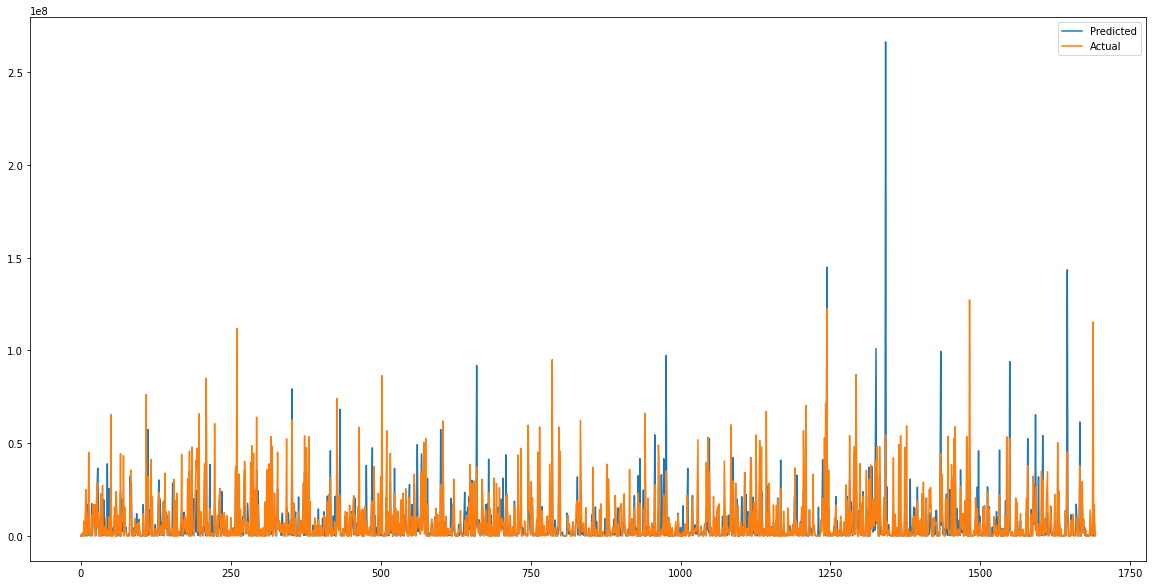

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -0.4328306672029895


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.506445078504487
RMSE : 0.7116495475333958


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score((y_test),(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.6349784791820441
Adjusted R2 :  0.6238594491073882


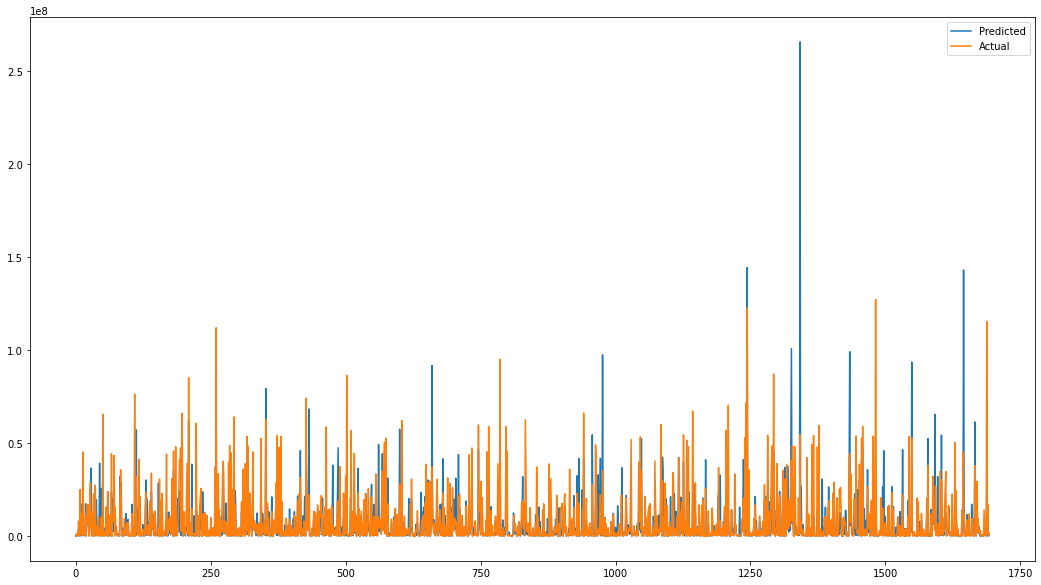

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

models = [LinearRegression(),
         Ridge(),
         ElasticNetCV(),
         DecisionTreeRegressor(),
         RandomForestRegressor(),
         ExtraTreesRegressor(),
         GradientBoostingRegressor()]

In [ ]:
from sklearn import model_selection
def train(model):
    kfold = model_selection.KFold(n_splits=5, random_state=42)
    pred = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))

In [ ]:
for model in models:
    train(model)

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
CV score: 0.561815448863636
Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
CV score: 0.5610574992980035
Model: HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)
CV score: 1.269821534132796
Model: ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)
CV score: 0.8465942024148123
Model: DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      m

**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=92, random_state=101)
model.fit(X_train, y_train)
y_pred_random = model.predict(X_test)

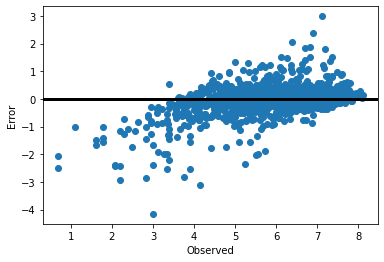

In [ ]:
# plot the error difference
error = y_test - y_pred_random
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score((y_test), (y_pred_random))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_random)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.8332717366178408
Adjusted R2 :  0.8281947493041332


In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_random))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_random))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_random)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.23132528802214322
RMSE : 0.4809628759292584
R2 : 0.8332717366178408
Adjusted R2 :  0.8281947493041332


In [ ]:
MSE  = mean_squared_error((y_test),(y_pred_random))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_random))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_random)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.23132528802214322
RMSE : 0.4809628759292584
R2 : 0.8332717366178408
Adjusted R2 :  0.8281947493041332


In [ ]:
features = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

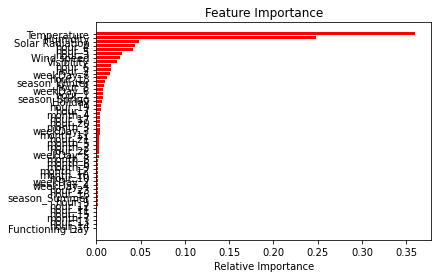

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

**USE NESTIMATORS OF 1000 in the Random Forest only**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_exp = RandomForestRegressor(n_estimators= 1000, random_state=100)
rf_exp.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=100, verbose=0, warm_start=False)

Predict for Test set

In [ ]:
predictions = rf_exp.predict(X_test)
# Performance metrics
errors = abs(predictions - y_test)

In [ ]:
print('Metrics for Random Forest Trained on Expanded Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')

Metrics for Random Forest Trained on Expanded Data
Average absolute error: 0.27 degrees.


In [ ]:
mape = np.mean(100 * (errors / y_test))

In [ ]:
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.98 %.


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MSE  = mean_squared_error((y_test),(predictions))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(predictions))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(predictions)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.2314615395352182
RMSE : 0.48110449959984597
R2 : 0.8331735330087481
Adjusted R2 :  0.8280935553293555


Predict for Training set


In [ ]:
predictions_xtrain = rf_exp.predict(X_train)

In [ ]:
errors = abs(predictions_xtrain - y_train)

In [ ]:
mape_train = np.mean(100 * (errors / y_train))

In [ ]:
accuracy = 100 - np.mean(mape_train)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.12 %.


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MSE  = mean_squared_error((y_train),(predictions_xtrain))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_train),(predictions_xtrain))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_train),(predictions_xtrain)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE : 0.0241236520945084
RMSE : 0.1553179065481775
R2 : 0.9820428057348513
Adjusted R2 :  0.9819092155379673


**GradiengtBoostingClassifier**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBClassifier

In [ ]:
grad_bos=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
grad_bos.fit(X_train, y_train)
y_pred_gradboosting = grad_bos.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test),(y_pred_gradboosting))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_gradboosting))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_gradboosting)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.31484789811233843
RMSE : 0.561113088523462
R2 : 0.7730726124643654
Adjusted R2 :  0.7661625214919039


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_gradboosting)

0.7730726124643654

# Inference:

Gradient Boosting also looks good but when we compare with the Random Forest
so Random Forest given better result for the dataset lets try with different parameter of Random Forest

# **Random Forest try to more accuracy:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

In [ ]:
randomForestAlgo = RandomForestRegressor()


param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=100, num=10)], 
         'max_depth' : [60,70,80,90,100],
         'min_samples_split':[2,4,6,8],
         'min_samples_leaf':[1,2,3,4],
         'bootstrap' : [True,False]
        }

gridSearch_RandomForest=GridSearchCV(randomForestAlgo,param,scoring='r2',cv=5,verbose=2,n_jobs=-1)
best_mode_try=gridSearch_RandomForest.fit(X_train,y_train)

In [ ]:
best_mode_try.best_params_

{'bootstrap': True,
 'max_depth': 70,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 90}

In [ ]:
randomForestAlgo = RandomForestRegressor()
param = {'bootstrap': [True],
         'max_depth': [70],
         'min_samples_leaf': [1],
        'min_samples_split': [2],
         'n_estimators': [90]}

gridSearch_RandomForest=GridSearchCV(randomForestAlgo,param,scoring='r2',cv=5,verbose=2,n_jobs=-1)
best_mode_try=gridSearch_RandomForest.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.3s finished


In [ ]:
y_random_pred=best_mode_try.predict(X_test) 

In [ ]:
MSE  = mean_squared_error((y_test),(y_random_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_random_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_random_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.23262969000795694
RMSE : 0.48231700157464585
R2 : 0.8323315857173212
Adjusted R2 :  0.8272259701788718


In [ ]:
errors = abs(y_random_pred - y_test)

In [ ]:
print('Metrics for Random Forest Trained on Expanded Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')

Metrics for Random Forest Trained on Expanded Data
Average absolute error: 0.28 degrees.


In [ ]:
mape = np.mean(100 * (errors / y_test))

In [ ]:
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.93 %.


Inferences:

The Random Forest Model gives the better R2 Score.

The Value of MSE and RMSE is also less.

The model give the Accuracy of 93.93%


# **Inference**:

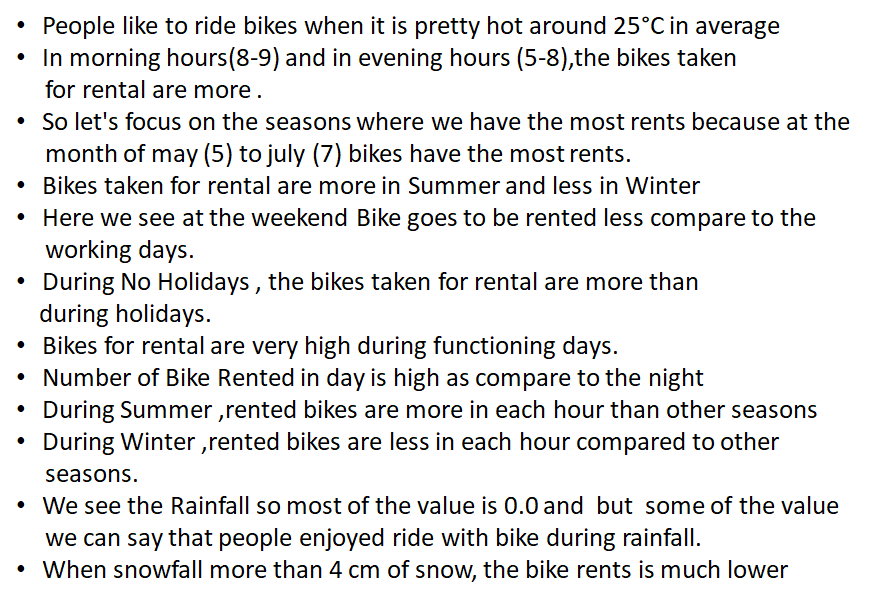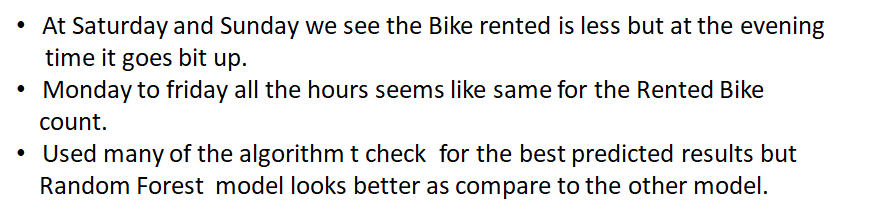